# Resposta ao impulso de tempo contínuo

Renato Naville Watanabe

A **resposta ao impulso** (às vezes também chamada de **resposta impulsiva**) de um sistema contínuo é o sinal de saída de um sistema quando um impulso $\delta(t)$ é usado como sinal de entrada do sistema e inicialmente o sistema está em repouso (a saída $y(t)$ e todas as suas derivadas iguais a zero). A resposta ao impulso é normalmente representada pela letra $h(t)$.

<img src=Imagens/diagimpulsocont.png width="300">

O sinal impulso é um sinal que ocorre em apenas um instante que tem amplitude infinita. É como se desse uma "pancada" no sistema ou o sistema fosse atingido por um raio. É algo muito forte que acontece por apenas um instante. Após o instante em que o impulso acontece ($t=0$) a entrada fica zero novamente.

Mas nesse único instante, o sistema recebe uma quantidade de energia que muda toda a configuração do sistema, mudando assim os valores do sinal de saída e de suas derivadas. Desta forma é como se as condições iniciais do sistema mudassem devido ao impulso. 

Portanto, para encontrar a resposta ao impulso de um sistema contínuo, linear e invariante no tempo, com a seguinte forma geral de equação diferencial:

$$\frac{d^Ny}{dt^N} + a_{N-1}\frac{d^{N-1}y}{dt^{N-1}}+...+a_0y(t) = b_M\frac{d^Mx}{dt^M} +...+b_2\frac{d^2x}{dt^2}+b_1\frac{dx}{dt} + b_0x(t) $$

basta encontrar a resposta de entrada nula do sistema considerando as novas condições iniciais devido ao impulso. Aqui esse sinal terá o símbolo $w(t)$ (é um sinal intermediário no cálculo da resposta ao impulso, sem nenhum significado físico). Essas condições iniciais são:

$$\frac{d^{N-1}w}{dt^{N-1}}(0) = 1, \frac{d^{N-2}w}{dt^{N-2}}(0) = 0, ..., w(0) = 0$$

Uma vez encontrada esse sinal $w(t)$, para encontrar a resposta ao impulso basta fazer:

$$h(t)= \left(b_M\frac{d^Mw}{dt^M} +...+b_2\frac{d^2w}{dt^2}+b_1\frac{dw}{dt} + b_0w(t)\right)u(t) $$

A demonstração desse método está no vídeo abaixo.

In [184]:
from manim import *
from manim.utils.color import Colors
config.media_width = "100%"
config.verbosity = "WARNING"

In [189]:
%%manim -qm ImpulseObtain

def step(x):
    if x >=0: 
        return 1
    else:
        return 0   

def zeros(x):
    return 0   


class ImpulseObtain(Scene):
    def construct(self):
        text1=MathTex(
            "\\frac{d^Ny}{dt^N} + a_{N-1}\\frac{d^{N-1}y}{dt^{N-1}}+a_{N-2}\\frac{d^{N-2}y}{dt^{N-2}}+...+a_0y(t)", 
            "=", 
            "b_M\\frac{d^Mx}{dt^M} +...+b_2\\frac{d^2x}{dt^2}+b_1\\frac{dx}{dt} + b_0x(t) ",
        font_size=35)
        self.play(Write(text1))
        text2=MathTex(
            "\\frac{d^Ny}{dt^N} + a_{N-1}\\frac{d^{N-1}y}{dt^{N-1}}+a_{N-2}\\frac{d^{N-2}y}{dt^{N-2}}+...+a_0y(t)", 
            "=", 
            "w(t)",        
        font_size=35)
        
        text3=MathTex(
            "w(t)", 
            "=", 
            "b_M\\frac{d^Mx}{dt^M} +...+b_2\\frac{d^2x}{dt^2}+b_1\\frac{dx}{dt} + b_0x(t) ",        
        font_size=35).move_to(DOWN)
        text5=MathTex(
            "\\frac{d^Nw}{dt^N} + a_{N-1}\\frac{d^{N-1}w}{dt^{N-1}}+a_{N-2}\\frac{d^{N-2}w}{dt^{N-2}}+...+a_0w(t)", 
            "=", 
            "\\delta(t)",        
        font_size=35).move_to((0,3,0))
        
        text6=MathTex(
            "h(t)", 
            "=", 
            "b_M\\frac{d^Mw}{dt^M} +...+b_2\\frac{d^2w}{dt^2}+b_1\\frac{dw}{dt} + b_0w(t) ",        
        font_size=35).move_to((0,2,0))
        brace1 = Brace(text1[2])
        brace1text = brace1.get_tex("w(t)")
        S1text = MathTex('S_1:  ').move_to((-5,0,0))
        S2text = MathTex('S_2:  ').move_to((-5,-1,0))
        # framebox2 = SurroundingRectangle(text[2], buff = .1)
        # self.play(
        #     Create(framebox1),
        # )
        self.wait()
        self.add(brace1)
        self.wait()
        self.add(brace1text)
        self.wait()
        self.remove(brace1, brace1text)
        self.play(
            ReplacementTransform(text1,text2),
            Write(text3)
        )
        self.add(S1text, S2text)
        self.wait(2)
        S1 = MathTex('S1').move_to((-5,0,0))
        S2 = MathTex('S2').move_to((-5,-1,0))
        self.play(S1.animate.move_to((3,-2,0)),
                  S2.animate.move_to((-3,-2,0)),
                  S1text.animate.move_to((-5,3,0)),
                  S2text.animate.move_to((-5,2,0)), 
                  text2.animate.move_to((0,3,0)),
                  text3.animate.move_to((0,2,0)))
        rec1 = SurroundingRectangle(S1, buff=0.7)
        rec2 = SurroundingRectangle(S2, buff=0.7)
        line1 = Arrow([-2.05,-2,0], [2,-2,0], buff=0)
        rec3 = SurroundingRectangle(Group(rec1, rec2, line1), buff=0.5)
        line2 = Arrow([-6,-2,0], [-4,-2,0], buff=0)
        line3 = Arrow([4,-2,0], [6,-2,0], buff=0)
        x = MathTex('x(t)').move_to((-5,-1.5,0))
        y = MathTex('y(t)').move_to((5,-1.5,0))
        w = MathTex('w(t)').move_to((0,-1.5,0))
        delta = MathTex('\\delta(t)').move_to((-5,-1.5,0))
        h = MathTex('h(t)').move_to((5,-1.5,0))
        self.add(rec1, rec2, line1, line2, line3, x, y, w, rec3)
        self.wait(2)
        self.play(ReplacementTransform(x, delta),
                  ReplacementTransform(y, h))
        self.wait(2)
        text4 = Text('SLIT').move_to((0,0,0))
        self.add(text4)
        self.play(S1.animate.move_to((-3,-2,0)),
                  S2.animate.move_to((3,-2,0)),
                  ReplacementTransform(text2, text5),
                  ReplacementTransform(text3, text6)
                  )
        self.wait(2)
        sis = Group(line1, line2, line3, S1, S2, rec1, rec2, rec3, delta, h, w)
        S2group = Group(S2text, text6)
        
        self.remove(text4)
        self.play(sis.animate.scale(0.5), S2group.animate.scale(0.7))
        self.play(sis.animate.move_to((-4,-3,0)), 
                  S2group.animate.move_to((2.5, -3,0)))
        
        
        ax = Axes(x_range=[-1, 4], y_range=[-1, 5], tips=False).scale(0.2).move_to((-6, 1.5,0))
        line4 = Arrow([-6.7,1.1,0], [-6.7,2,0], buff=0, color=BLUE)
        
        ax2 = Axes(x_range=[-1, 4], y_range=[-1, 5], tips=False).scale(0.2).move_to((-3, 1.5,0))
        graph2 = ax2.plot(lambda x: step(x), color=BLUE, x_range=[-1, 0.5, 0.01],
                        use_smoothing=False)
        
        ax3 = Axes(x_range=[-1, 4], y_range=[-1, 5], tips=False).scale(0.2).move_to((0, 1.5,0))
        graph3 = ax3.plot(lambda x: zeros(x), color=BLUE, x_range=[-1, 0.5, 0.01],
                            use_smoothing=False)
        
        ax4 = Axes(x_range=[-1, 4], y_range=[-1, 5], tips=False).scale(0.2).move_to((2.7, 1.5,0))
        graph4 = ax4.plot(lambda x: zeros(x), color=BLUE, x_range=[-1, 0.5, 0.01],
                        use_smoothing=False)
        
        ax5 = Axes(x_range=[-1, 4], y_range=[-1, 5], tips=False).scale(0.2).move_to((6, 1.5,0))
        line5 = Arrow([5.3,1.1,0], [5.3,2,0], buff=0, color=BLUE)
        
        text6 = MathTex('+').move_to((-4.8,1.5,0))
        text7 = MathTex('+').move_to((-1.8,1.5,0))
        text8 = MathTex('...').move_to((1.2,1.5,0))
        text9 = MathTex('=').move_to((4.2,1.5,0))
        self.add(ax, line4, ax2, graph2, ax3, graph3, 
                 ax4, graph4, ax5, line5, 
                 text6, text7, text8, text9)
        self.wait(2)
        text10 = MathTex('\\frac{d^Nw}{dt^N}(0) = \\delta(0)').next_to(ax, DOWN).scale(0.7)
        text11 = MathTex('\\frac{d^{N-1}w}{dt^{N-1}}(0) = 1').next_to(ax2, DOWN).scale(0.7)
        text12 = MathTex('\\frac{d^{N-2}w}{dt^{N-2}}(0) = 0').next_to(ax3, DOWN).scale(0.7)
        text13 = MathTex('w(0) = 0').next_to(ax4, DOWN).scale(0.7)
        self.add(text10, text11, text12, text13)   
        winit = Group(text10, text11, text12, text13)
        self.wait(5)
        self.remove(ax, line4, ax2, graph2, ax3, graph3, 
                    ax4, graph4, ax5, line5, text6, 
                    text7, text8, text9)
        text13 =  MathTex('\\frac{d^Nw}{dt^N}(0) = \\delta(0), ', '\\frac{d^{N-1}w}{dt^{N-1}}(0) = 1, ',
                          '\\frac{d^{N-2}w}{dt^{N-2}}(0) = 0, ','...', 'w(0) = 0').scale(0.6).next_to(text5, DOWN)   
        self.play(ReplacementTransform(winit, text13))
        self.wait(3)
        text14 = MathTex('w(t) = y_{zi}(t), \\text{ com } ', '\\frac{d^{N-1}w}{dt^{N-1}}(0) = 1, ',
                          '\\frac{d^{N-2}w}{dt^{N-2}}(0) = 0, ','...', 'w(0) = 0').scale(0.6).next_to(text5, DOWN)
        self.play(ReplacementTransform(text13, text14))
        self.wait(2)
        S1group = Group(S1text, text5)
        self.play(S2group.animate.scale(1/0.7), S1group.animate.scale(0.7))
        self.play(S2group.animate.move_to((-2, 3,0)),
                  S1group.animate.move_to((2.5, -3, 0)))
        
        self.wait(2)
        text15=MathTex(
            "h(t)", 
            "=", 
            "b_M\\frac{d^Mw}{dt^M} +...+b_2\\frac{d^2w}{dt^2}+b_1\\frac{dw}{dt} + b_0w(t) ",        
        font_size=35).move_to((-1.5,3,0))
        self.remove(text14)
        self.play(ReplacementTransform(S2group, text15))
        self.wait(5)
        
        
        
        
        

## Exemplo 1:

Vamos encontrar a resposta ao impulso para o sistema com a equação diferencial abaixo:

$\frac{dy}{dt} - 0.5y(t) = x(t)$

A raiz do polinômio característico da equação diferencial é $\lambda_1=0.5$. Então $w(t)$ é:

$w(t)=A_1e^{\lambda t}$

Considerando a condição inicial $w(0) = 1$.

$w(t) = e^{0.5 t}$

Portanto, a resposta ao impulso desse sistema é:

$h(t) = e^{0.5 t}u(t)$

## Exemplo 2

Vamos agora obter uma expressão da resposta ao impulso da seguinte equação diferencial:

$\frac{d^2y}{dt^2} + 3\frac{dy}{dt} - 4y(t) = 3x(t) + \frac{dx}{dt}$

As raízes do polinômio característico da equação são:

$\lambda_1 = \frac{-3 + \sqrt{9+16}}{2} = 1$ e $\lambda_2 = \frac{-3 - \sqrt{9+16}}{2} = -4$

O sinal $w(t)$ é:

$w(t) = A_1e^{t} + A_2e^{-4t}$, com $w(0) = 0$ e $\frac{dw}{dt}(0) = 1$.

Então:

$w(t) = 0.2e^t-0.2e^{-4t}$

Usando os coeficientes que multiplicam $x(t)$ e suas derivadas, temos:

$$h(t) = (3w(t) + \frac{dw}{dt})u(t) = (0.6e^t-0.6e^{-4t} + 0.2e^t +0.8e^{-4t})u(t) = (0.8e^t+0.2e^{-4t})u(t)$$

## Exemplo 3

Vamos encontrar a resposta ao impulso de um sistema com a seguinte equação diferencial.

$$\frac{d^2y}{dt^2} = -4\frac{dy}{dt} - 4y(t) + 3x(t)$$

O polinômio característico é:

$\lambda^2 + 4\lambda + 4 = 0$

As raízes da equação são iguais e iguais a -2. Então, o sinal $w(t)$ é:

$w(t) = c_1e^{-2t} + c_2te^{-2t}$, com $w(0) = 0$ e $\frac{dw}{dt}(0) = 1$.

Então, 

$$w(t) = te^{-2t}$$

Portanto , a resposta ao impulso é:

$$h(t) = 3te^{-2t}u(t)$$





## Exemplo 4

Considere um sistema com a seguinte equação diferencial:

$$\frac{d^2y}{dt^2} = -2\frac{dy}{dt} - 2y(t) + x(t) + 2\frac{dx}{dt}$$

Para encontrar a resposta ao impulso desse sistema, calculamos as raízes do seu polinômio característico.

$\lambda_1 = \frac{-2 + \sqrt{4-8}}{2} = -1+j$ e $\lambda_2 = \frac{-2 - \sqrt{4-8}}{2} = -1-j$

Como as raízes são complexas, o sinal $w(t)$ terá a forma:

$w(t) = Ae^{-t}\cos(t+\theta)$, com $w(0) = 0$ e $\frac{dw}{dt}(0) = 1$.

Usando os valores iniciais, temos:

$w(t) = e^{-t}\cos\left(t-\frac{\pi}{2}\right)$

Portanto, a resposta ao impulso é:

$$h(t) = w(t) + 2\frac{dw}{dt} = e^{-t}\cos\left(t-\frac{\pi}{2}\right) - 2e^{-t}\cos\left(t-\frac{\pi}{2}\right) - 2e^{-t}\mathrm{sen}\left(t-\frac{\pi}{2}\right) = - e^{-t}\cos\left(t-\frac{\pi}{2}\right) - 2e^{-t}\mathrm{sen}\left(t-\frac{\pi}{2}\right)$$


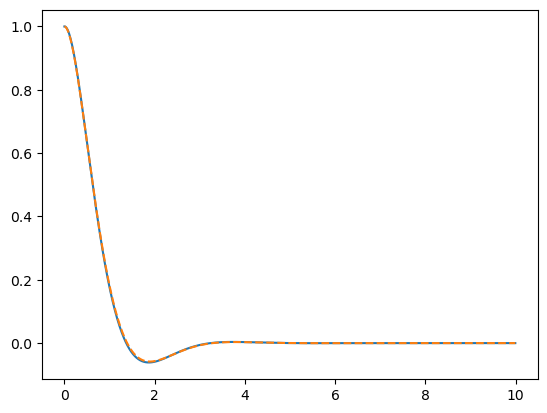

In [10]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.01
t = np.arange(0,10, dt)
x = np.zeros_like(t)
y = np.zeros_like(t)

x[0] = 1/dt
x2 = 0
x1 = 0
for i in range(len(t)):
    dx1 = x2
    dx2 = -3*x2 - 5*x1 + x[i]
    
    x1 = x1 + dt*dx1
    x2 = x2 + dt*dx2
    y[i] = 3*x1 + x2
plt.plot(t, y)
omega0 = np.sqrt(11)/2
A = -2*np.sqrt(11)/11*np.exp(-3/2*t)
theta = omega0*t - np.pi/2
plt.plot(t,A*(-1.5*np.cos(theta)+omega0*np.sin(theta)), '--')
        

## Exercícios

**1)** Encontre a resposta ao impulso dos sistemas descritos pelas seguintes equações diferenciais e condições iniciais.

a) $\frac{d^2y}{dt^2} = -4\frac{dy}{dt}-6y(t) + \frac{dx}{dt} + x(t)$, com $y(0) = 2, \frac{dy}{dt}(0) = 1$

b) $\frac{d^2y}{dt^2} = -4\frac{dy}{dt}-4y(t)  + x(t)$, com $y(0) = 3, \frac{dy}{dt}(0) = -4$

c) $\frac{d^2y}{dt^2} = -\frac{dy}{dt} + \frac{dx}{dt} + x(t)$, com $y(0) = 1, \frac{dy}{dt}(0) = 1$

d) $\frac{d^2y}{dt^2} = -4y(t) + x(t)$, com $y(0) = 0, \frac{dy}{dt}(0) = 6$

e) $\frac{d^2y}{dt^2} = -4\frac{dy}{dt}-13y(t) + 4\frac{dx}{dt} + 2x(t)$, com $y(0) = 1, \frac{dy}{dt}(0) = 9.9$

f) $\frac{d^3y}{dt^3} = -1\frac{d2y}{dt^2} + 2\frac{d^2x}{dt^2} + 3x(t)$, com $y(0) = 2, \frac{dy}{dt}(0) = 1, \frac{d2y}{dt^2}(0) = 0$

## Referências

- Lathi, BP, Sinais e Sistemas Lineares, 2007